In this notebook, we replicate the setup from Brown+19 and apply PCA to the dataset as a simple feature extractor. We use a linear binary classifier to get a benchmark for the complexity classification task.

In [1]:
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.insert(1, '/home/alg010/ruby/coda/codes/')
import CodaPCA

ImportError: Traceback (most recent call last):
  File "/apps/tensorflow/1.12.0-py36-gpu/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/apps/tensorflow/1.12.0-py36-gpu/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/apps/tensorflow/1.12.0-py36-gpu/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/apps/python/3.6.1/lib/python3.6/imp.py", line 242, in load_module
    return load_dynamic(name, filename, file)
  File "/apps/python/3.6.1/lib/python3.6/imp.py", line 342, in load_dynamic
    return _load(spec)
ImportError: libcudnn.so.7: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [2]:
freqs_hz = numpy.concatenate([
    numpy.arange(700e6, 1300e6, 1e6),
    numpy.arange(1500e6, 1800e6, 1e6)])
assert freqs_hz.shape == (900,)
c_mps = 299792458
wls_m2 = (c_mps / freqs_hz) ** 2

$$
    P(\lambda^2) = P_1 e^{2i(\chi_1 + \phi_1 \lambda^2)} + P_2 e^{2i(\chi_2 + \phi_2 \lambda^2)}
$$

In [18]:
# Generate parameters for the Faraday spectra

numpy.random.seed(1)

N = 130000
size = (N, 1)
P1 = numpy.ones(size)
P2 = numpy.random.uniform(0, 1, size=size)
simple = numpy.random.randint(2, size=size, dtype=bool)
P2[simple] = 0
phi_1 = numpy.random.uniform(-50, 50, size=size)
phi_2 = numpy.random.uniform(-50, 50, size=size)
chi_1 = numpy.random.uniform(0, numpy.pi, size=size)
chi_2 = numpy.random.uniform(0, numpy.pi, size=size)
sigma = numpy.random.uniform(0, 0.333, size=size)
noise = (
    numpy.random.normal(
        scale=sigma, size=(N, len(wls_m2))) +
    numpy.random.normal(
        scale=sigma, size=(N, len(wls_m2))) * 1j)

In [19]:
# Then generate the spectra.
P = (
    P1 * numpy.exp(2j * (chi_1 + phi_1 * wls_m2)) +
    P2 * numpy.exp(2j * (chi_2 + phi_2 * wls_m2)))

In [20]:
# Finally, add noise to obtain the noisy spectra.
P_noisy = P + noise

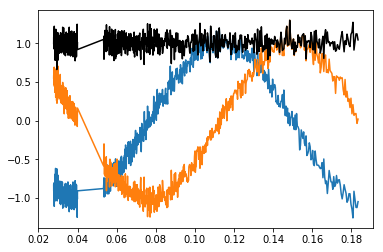

In [32]:
plt.plot(wls_m2, P_noisy[2].real)
plt.plot(wls_m2, P_noisy[2].imag)
plt.plot(wls_m2, abs(P_noisy[2]), c='k')

With our dataset in place, we can go ahead and do PCA.